In [33]:
%pip install nbformat

  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [nbformat]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd

# Path to extracted dataset folder
DATA_PATH = "/Users/akki/Desktop/AKKI/college/AI in Healthcare/Project/Blood Glucose Prediction/Diabetes-Data"  # adjust this path to where data-01 ... data-70 are stored

# Define column names
columns = ["Date", "Time", "Code", "Value"]

# Define logical times for paper records
PAPER_TIMES = {"08:00", "12:00", "18:00", "22:00"}

# List to store DataFrames
all_patients = []

# Iterate through patient files
for filename in os.listdir(DATA_PATH):
    if filename.startswith("data-"):  # process only data files
        patient_id = filename.replace("data-", "")  # extract patient ID
        file_path = os.path.join(DATA_PATH, filename)

        # Load file
        df = pd.read_csv(file_path, sep="\t", names=columns, engine="python")

        # Add patient_id
        df["patient_id"] = patient_id

        # Convert datetime
        df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce")

        # Label record type
        df["record_type"] = df["Time"].apply(lambda t: "Paper" if t in PAPER_TIMES else "Electronic")

        # Append to list
        all_patients.append(df)

# Merge all DataFrames
master_df = pd.concat(all_patients, ignore_index=True)

# Sort for consistency
df = master_df.sort_values(by=["patient_id", "datetime"]).reset_index(drop=True)

print("Master DataFrame shape:", df.shape)
print(df.head())

Master DataFrame shape: (29330, 7)
         Date   Time  Code Value patient_id            datetime record_type
0  04-21-1991   9:09    58   100         01 1991-04-21 09:09:00  Electronic
1  04-21-1991   9:09    33     9         01 1991-04-21 09:09:00  Electronic
2  04-21-1991   9:09    34    13         01 1991-04-21 09:09:00  Electronic
3  04-21-1991  17:08    62   119         01 1991-04-21 17:08:00  Electronic
4  04-21-1991  17:08    33     7         01 1991-04-21 17:08:00  Electronic


In [2]:
df.to_csv("patient_data.csv", index=False)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Code dictionary
code_map = {
    33: "Regular insulin dose",
    34: "NPH insulin dose",
    35: "UltraLente insulin dose",
    48: "Unspecified BG measurement",
    57: "Unspecified BG measurement",
    58: "Pre-breakfast BG",
    59: "Post-breakfast BG",
    60: "Pre-lunch BG",
    61: "Post-lunch BG",
    62: "Pre-supper BG",
    63: "Post-supper BG",
    64: "Pre-snack BG",
    65: "Hypoglycemic symptoms",
    66: "Typical meal",
    67: "More-than-usual meal",
    68: "Less-than-usual meal",
    69: "Typical exercise",
    70: "More-than-usual exercise",
    71: "Less-than-usual exercise",
    72: "Special event"
}

df["Event"] = df["Code"].map(code_map)

In [4]:
import pandas as pd

# Ensure datetime is proper type
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(['patient_id', 'datetime'])

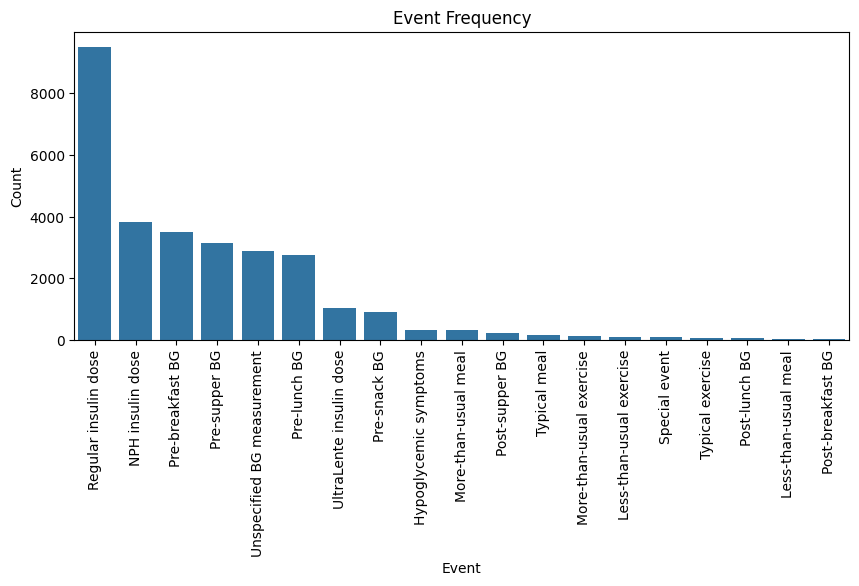

In [8]:
event_counts = df['Event'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.xticks(rotation=90)
plt.title('Event Frequency')
plt.ylabel('Count')
plt.show()

In [10]:
import plotly.express as px
fig = px.scatter(df, x='datetime', y='Value', color='Event', hover_data=['Code','record_type'])
fig.show()

In [ ]:
import plotly.express as px

# Select one patient
patient_id = '01'
patient_df = df[df['patient_id'] == patient_id]

# Focus on relevant events (BG measurements + insulin doses)
relevant_events = ['BG']
filtered_df = patient_df[patient_df['Event'].str.contains('|'.join(relevant_events))]

fig = px.scatter(
    filtered_df,
    x='datetime',
    y='Value',
    color='Event',
    symbol='Event',          
    hover_data=['Code', 'Event', 'Value'],
    title=f'Blood Glucose & Insulin Events for Patient {patient_id}',
    labels={'Value':'Glucose / Dose', 'datetime':'Datetime'}
)

fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Value',
    legend_title='Event',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)
fig.show()